<a href="https://colab.research.google.com/github/ThuanPhat2709/BT-AI/blob/main/TropicalFruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tropical Fruit

## Import Library

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input,MaxPooling2D,Conv2D
from keras.backend import conv2d
from keras.layers.core.flatten import Flatten
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
import cv2
import os
import tensorflow as  tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

## Data Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.2,
                           rotation_range=40,
                           shear_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           fill_mode='nearest',
                           horizontal_flip=True)

In [ ]:
train_set=data.flow_from_directory('/content/drive/MyDrive/TraiCay/train',
                                     target_size=(100,100),
                                     batch_size=12,
                                     class_mode='categorical',
                                     shuffle=True,)
valid_set=data.flow_from_directory('/content/drive/MyDrive/TraiCay/validation',
                                              target_size=(100,100),
                                              batch_size=12,
                                              class_mode='categorical',
                                              shuffle=True)

Found 800 images belonging to 10 classes.
Found 101 images belonging to 10 classes.


## Create Model

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same",input_shape=(100,100,3)))
model.add(Conv2D(16,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(32,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(64,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"))
model.add(MaxPooling2D((2,2)))
#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                  

In [ ]:
opt=SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(train_set,epochs=20, batch_size=12,validation_data=(valid_set),verbose=1)

Epoch 1/20
67/67 [==============================] - 33s 478ms/step - loss: 2.0089 - accuracy: 0.2587 - val_loss: 1.5340 - val_accuracy: 0.3663
Epoch 2/20
67/67 [==============================] - 34s 510ms/step - loss: 1.4865 - accuracy: 0.4263 - val_loss: 1.3268 - val_accuracy: 0.5050
Epoch 3/20
67/67 [==============================] - 32s 473ms/step - loss: 1.1209 - accuracy: 0.5775 - val_loss: 0.7247 - val_accuracy: 0.7624
Epoch 4/20
67/67 [==============================] - 32s 475ms/step - loss: 0.9196 - accuracy: 0.6700 - val_loss: 0.7257 - val_accuracy: 0.7129
Epoch 5/20
67/67 [==============================] - 32s 479ms/step - loss: 0.9822 - accuracy: 0.6562 - val_loss: 0.8038 - val_accuracy: 0.6634
Epoch 6/20
67/67 [==============================] - 32s 479ms/step - loss: 0.8474 - accuracy: 0.6963 - val_loss: 0.5873 - val_accuracy: 0.7822
Epoch 7/20
67/67 [==============================] - 32s 475ms/step - loss: 0.8141 - accuracy: 0.6900 - val_loss: 0.6387 - val_accuracy: 0.7921

## Create Label

In [ ]:
train_set.class_indices

{'cachua': 0,
 'cam': 1,
 'chuoi': 2,
 'dau': 3,
 'khe': 4,
 'khom': 5,
 'mangcut': 6,
 'tao': 7,
 'traimo': 8,
 'xoai': 9}

In [ ]:
Names={0: 'Cà Chua',
 1: 'Cam',
 2: 'Chuối',
 3: 'Dâu',
 4: 'Khế',
 5: 'Khóm',
 6: 'Măng Cụt',
 7: 'Táo',
 8: 'Mơ',
 9: 'Xoài'}

## Test Model

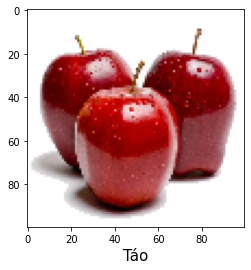

In [ ]:
img=load_img('2.png',target_size=(100,100,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,100,100,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

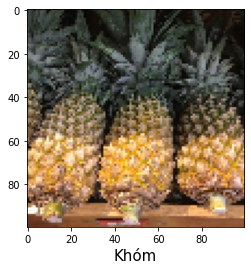

In [ ]:
img=load_img('3.png',target_size=(100,100,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,100,100,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

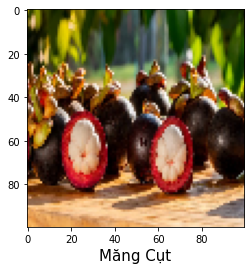

In [ ]:
img=load_img('4.png',target_size=(100,100,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,100,100,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

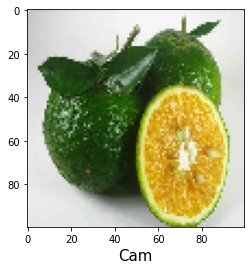

In [ ]:
img=load_img('5.png',target_size=(100,100,3))
plt.imshow(img)
img=img_to_array(img)
img=img/255
img=img.reshape(1,100,100,3)
img=img.astype('float')
plt.xlabel(Names[np.argmax(model.predict(img))],fontsize=15)
plt.show()

## Accuracy

In [ ]:
score=model.evaluate(valid_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

9/9 [==============================] - 2s 162ms/step - loss: 0.2880 - accuracy: 0.8614
Sai số:  0.2879932224750519
Độ chính xác:  0.8613861203193665


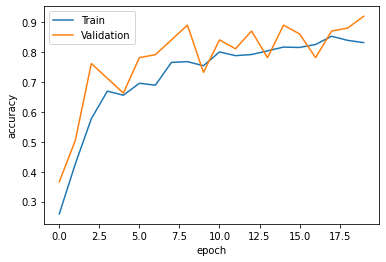

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

## Save Model

In [ ]:
model.save('TraiCay.h5')#lưu mô hình
from tensorflow.keras.models import load_model
model4=load_model('TraiCay.h5')